In [2]:
import pandas as pd
from empath import Empath

In [44]:
sdata = pd.read_csv("final-clean-sentiment_class.csv")
sdata.drop('Unnamed: 0', axis=1, inplace=True)
sdata.clean_tweet4 = sdata.clean_tweet4.astype(str) # float type error z
sdata.head(2)


,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,check,sentiment,sentiment_class
0,12/29/2019 13:54,[],JesusDailyTwits,1,0,0,depression,best depression killer worshipping jesus try v...,2019,12,mh,-0.2960,Negative
1,12/29/2019 12:47,[],Aluvrendar,67,3,6,depression,hope blessings majlis depression never return ...,2019,12,mh,0.6149,Very Positive


In [45]:
# Empath Analysis
# THe empath column returned all values that are not 0
lexicon = Empath()
def empath_analysis(text):
    analysis = lexicon.analyze(text, normalize=True)
    analysis = [k for k, v in analysis.items() if v != 0]
    return analysis

In [46]:
sdata["Empath"] = sdata.clean_tweet4.apply(lambda x: empath_analysis(x))

In [88]:
sdata.to_csv('Empath analysis.csv')

In [56]:
# Show the raw Empath analysis output 
def raw_ea(text):
    analysis = lexicon.analyze(text, normalize=True)
    return analysis

sdata["Empath_r"] = sdata.clean_tweet4[:100].apply(lambda x: raw_ea(x))

In [87]:
# Show the raw output values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

er = sdata["Empath_r"][:100]
for i in range(len(er)): 
    each = er[i]
    print('\n \n ')
    for k,v in each.items():
        if v!= 0:
            print(k,v)
        
#analysis = {k:v for k, v in er.items() if v != 0}
    

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.



 
 

family 0.14285714285714285
crime 0.14285714285714285
health 0.14285714285714285
suffering 0.14285714285714285
neglect 0.14285714285714285
sadness 0.14285714285714285
friends 0.14285714285714285

 
 

medical_emergency 0.07692307692307693
health 0.15384615384615385
nervousness 0.15384615384615385
horror 0.07692307692307693
suffering 0.07692307692307693
optimism 0.15384615384615385
fear 0.15384615384615385
healing 0.07692307692307693
neglect 0.07692307692307693
injury 0.07692307692307693
sadness 0.15384615384615385
giving 0.07692307692307693
positive_emotion 0.15384615384615385

 
 

aggression 0.03125
family 0.03125
vacation 0.03125
crime 0.03125
health 0.03125
government 0.0625
suffering 0.03125
magic 0.03125
stealing 0.03125
divine 0.03125
sexual 0.03125
driving 0.03125
body 0.03125
death 0.03125
healing 0.03125
legend 0.03125
violence 0.03125
neglect 0.03125
communication 0.03125
fight 0.03125
vehicle 0.03125
war 0.0625
speaking 0.03125
science 0.03125
sadness 0.03125
traveling

domestic_work 0.05
family 0.05
health 0.05
suffering 0.05
optimism 0.05
home 0.05
celebration 0.05
neglect 0.05
love 0.05
sadness 0.05
affection 0.05
clothing 0.05
negative_emotion 0.05
friends 0.05
positive_emotion 0.05

 
 

health 0.14285714285714285
suffering 0.14285714285714285
morning 0.14285714285714285
restaurant 0.14285714285714285
neglect 0.14285714285714285
shopping 0.14285714285714285
sadness 0.14285714285714285
alcohol 0.14285714285714285
liquid 0.2857142857142857

 
 

medical_emergency 0.25
health 0.5
suffering 0.25
neglect 0.25
sadness 0.25
negative_emotion 0.25

 
 

health 0.05555555555555555
dispute 0.05555555555555555
suffering 0.05555555555555555
ridicule 0.05555555555555555
childish 0.05555555555555555
body 0.05555555555555555
neglect 0.05555555555555555
communication 0.05555555555555555
hearing 0.05555555555555555
meeting 0.05555555555555555
speaking 0.1111111111111111
listen 0.05555555555555555
phone 0.05555555555555555
sadness 0.05555555555555555
fun 0.05555555

In [125]:
# Count Frequent Words

from collections import Counter
cnt = Counter()
counts = 0
for text in sdata["Empath"]:
    for word in text:
        cnt[word] += 1
cnt.most_common(50)




[('negative_emotion', 18811),
 ('violence', 14057),
 ('health', 11129),
 ('positive_emotion', 10855),
 ('help', 10504),
 ('kill', 10262),
 ('business', 9550),
 ('death', 8816),
 ('sleep', 8536),
 ('optimism', 8390),
 ('giving', 8083),
 ('night', 7925),
 ('morning', 7844),
 ('speaking', 7770),
 ('breaking', 7417),
 ('communication', 7226),
 ('friends', 6981),
 ('suffering', 6753),
 ('work', 6704),
 ('fight', 6550),
 ('dispute', 6377),
 ('party', 6351),
 ('family', 6259),
 ('power', 6190),
 ('war', 6151),
 ('traveling', 6100),
 ('healing', 6007),
 ('pain', 5928),
 ('competing', 5774),
 ('medical_emergency', 5773),
 ('children', 5702),
 ('nervousness', 5672),
 ('aggression', 5637),
 ('celebration', 5614),
 ('school', 5592),
 ('home', 5584),
 ('vacation', 5521),
 ('trust', 5508),
 ('movement', 5285),
 ('love', 5096),
 ('social_media', 4897),
 ('sadness', 4844),
 ('meeting', 4836),
 ('domestic_work', 4804),
 ('shame', 4772),
 ('body', 4503),
 ('wedding', 4435),
 ('economics', 4374),
 ('stre

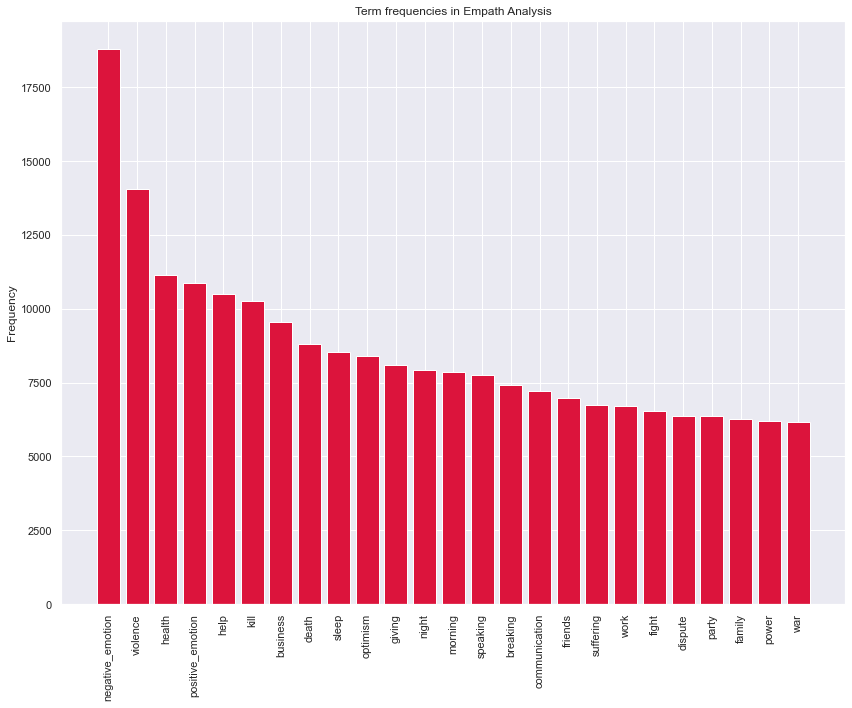

In [124]:
# Visualize empath analysis 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 10))
y = [count for tag, count in cnt.most_common(25)]
x = [tag for tag, count in cnt.most_common(25)]

plt.bar(x, y, color='crimson')
plt.title("Term frequencies in Empath Analysis")
plt.ylabel("Frequency")

plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()
plt.show();